In [17]:
# Importation
# Data Link: https://www.quandl.com/data/EOD-End-of-Day-US-Stock-Prices
import quandl
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [2]:
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

In [3]:
stock_list = ['HD', 'DIS', 'MSFT', 'BA', 'MMM', 'NKE', 'JNJ', 'MCD', 'INTC', 'PFE']

In [4]:
api_key = 'eM8XeUz56BZQqV7yDxcv'
quandl.ApiConfig.api_key = api_key

In [5]:
df_list = []
for stock in stock_list:
    p = 'EOD/'+ stock
    q = quandl.get(p)
    d = pd.DataFrame(q)
    df_list.append(d)

In [6]:
print (stock_list[0])
df_list[0].head()

HD


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,63.929303,64.288120,62.946827,63.134779,7802800.0
2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,63.203125,63.655918,62.998086,63.339817,8271600.0
2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,63.280014,63.399620,62.229192,62.357341,11039000.0
2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,62.835764,62.844307,61.690966,62.109586,9968400.0
2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,62.348798,63.040803,62.280452,62.861394,5781800.0


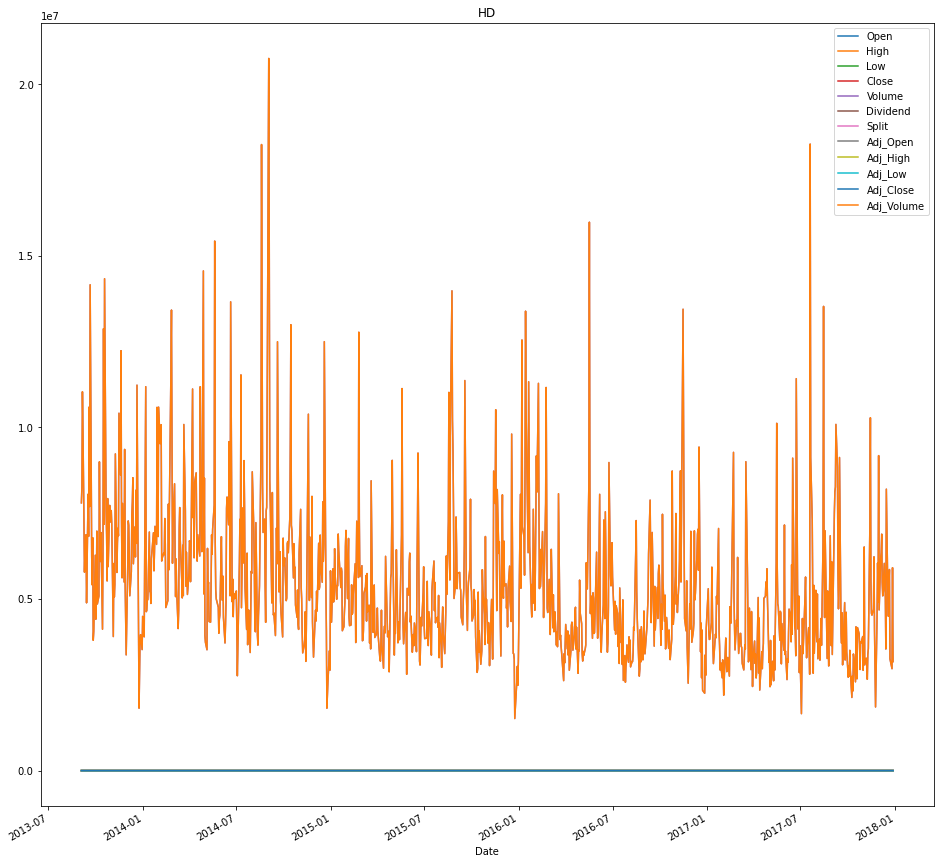

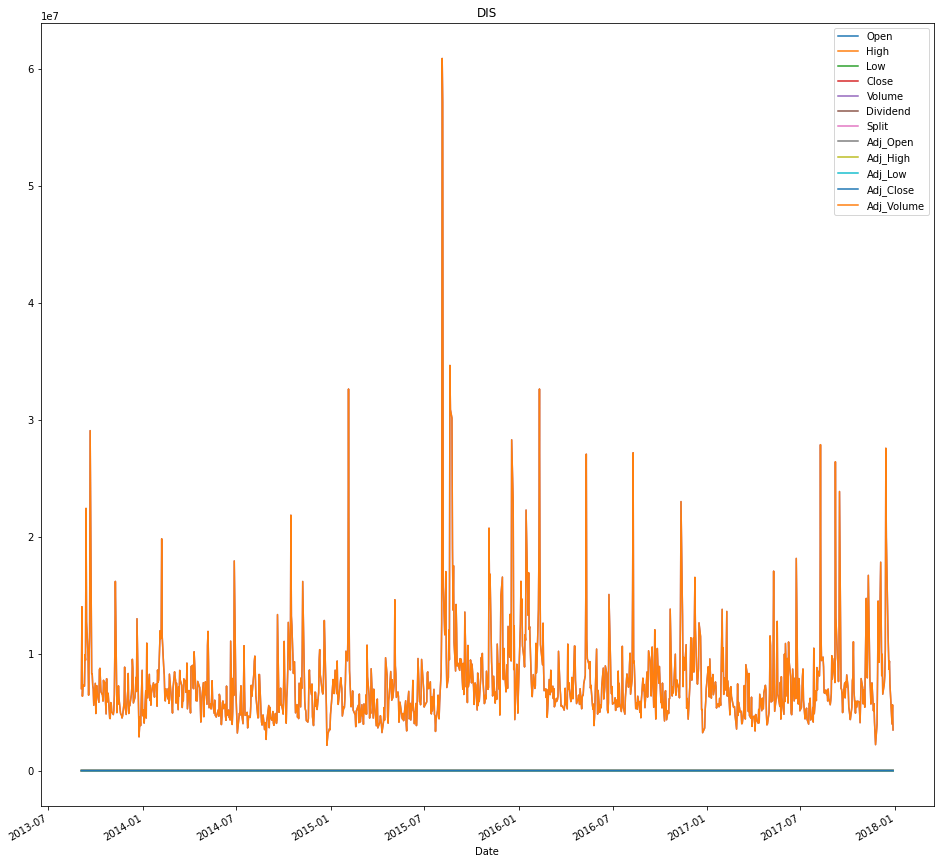

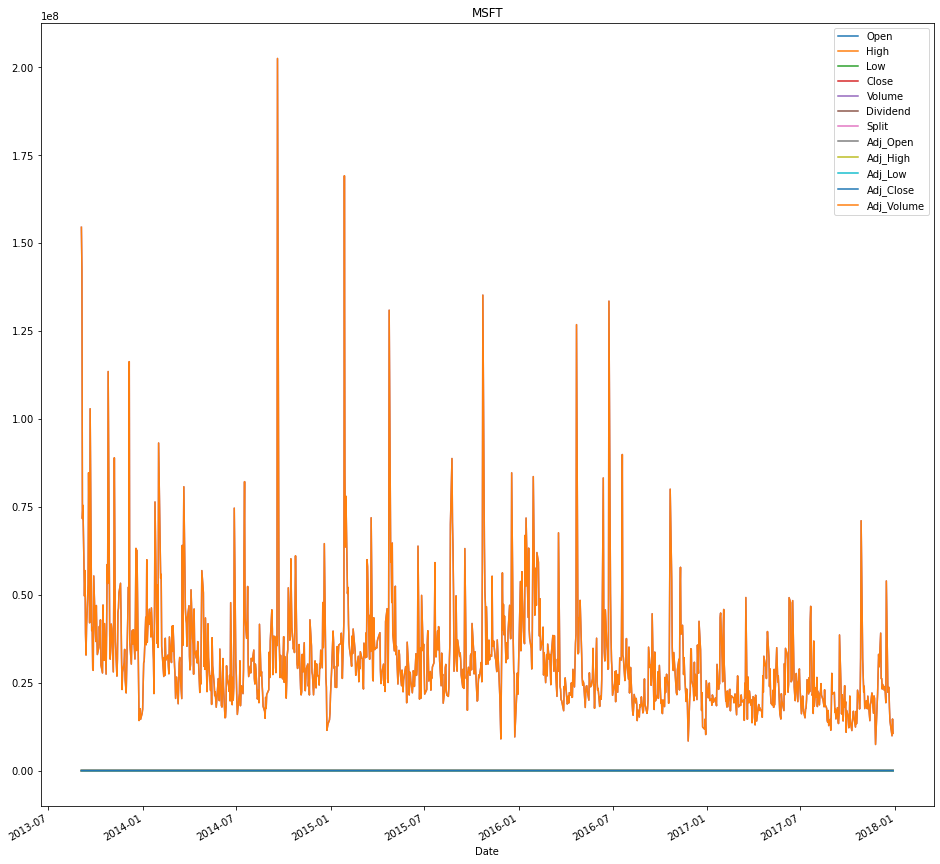

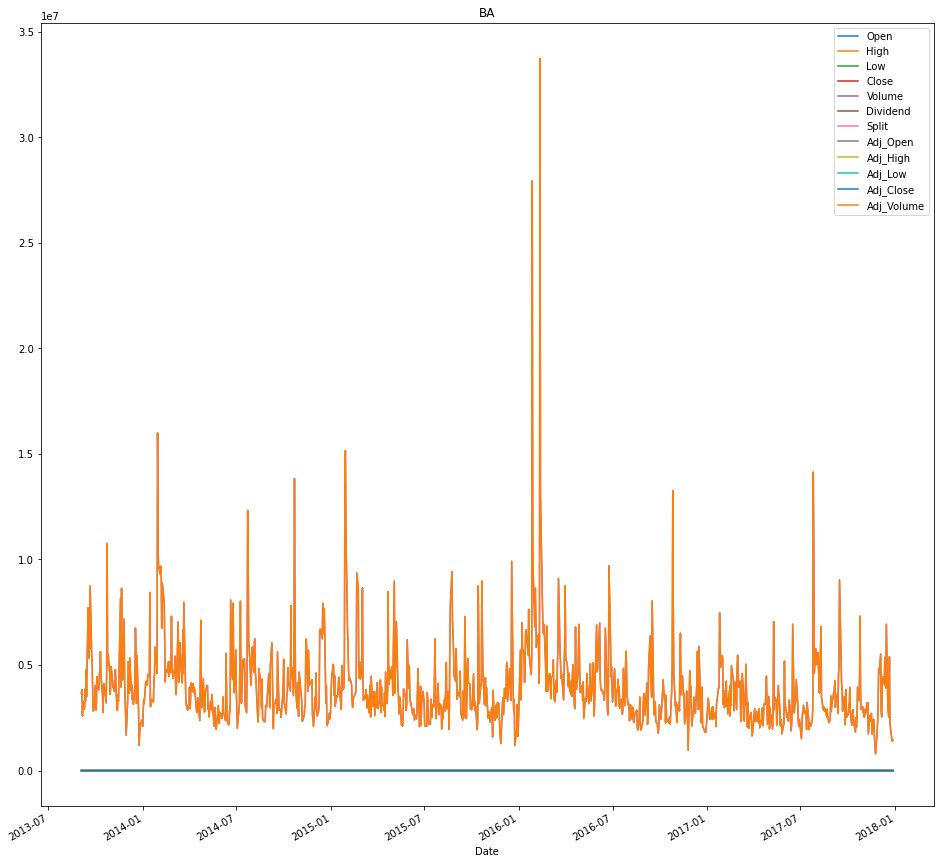

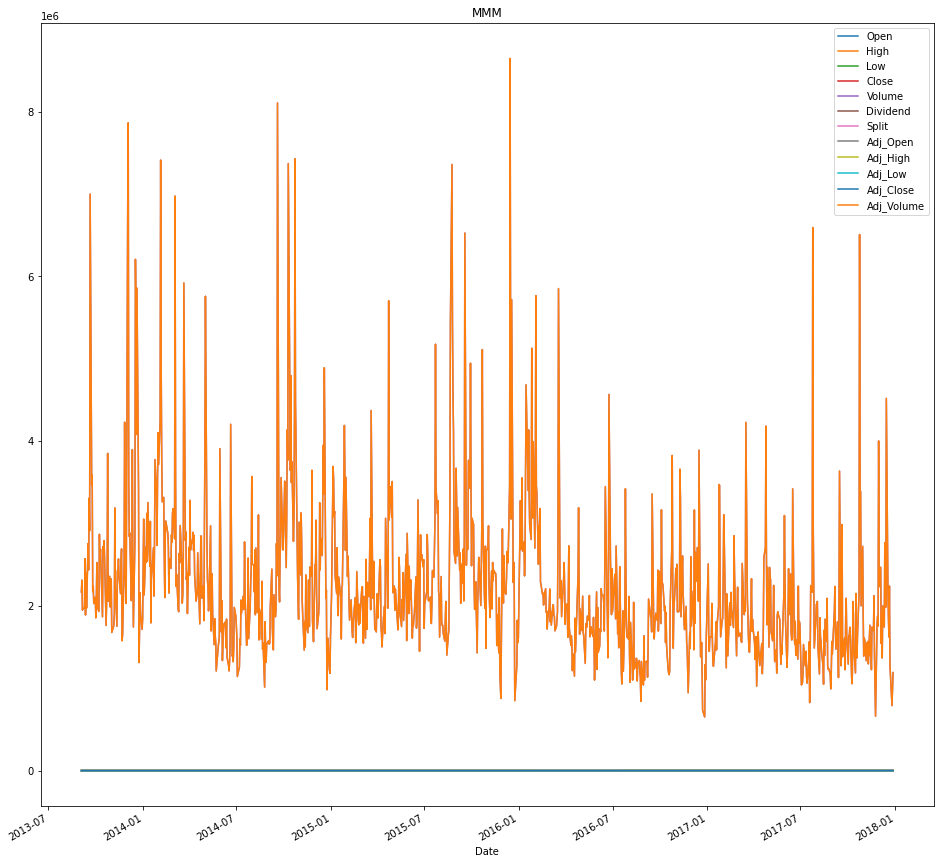

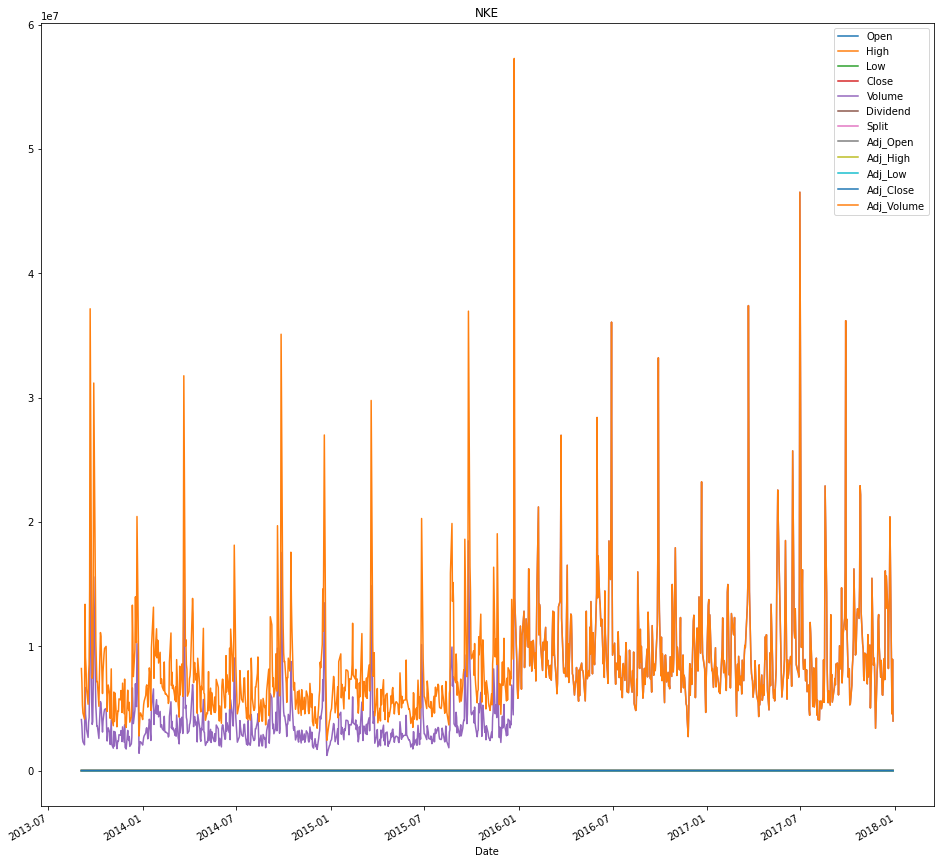

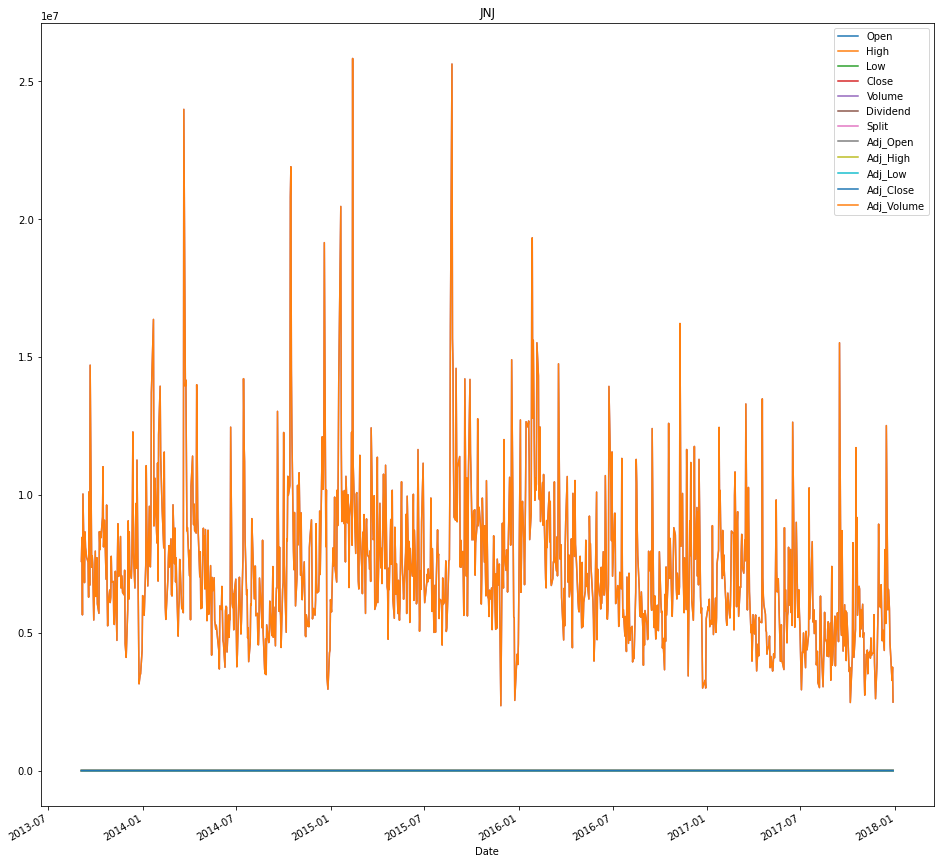

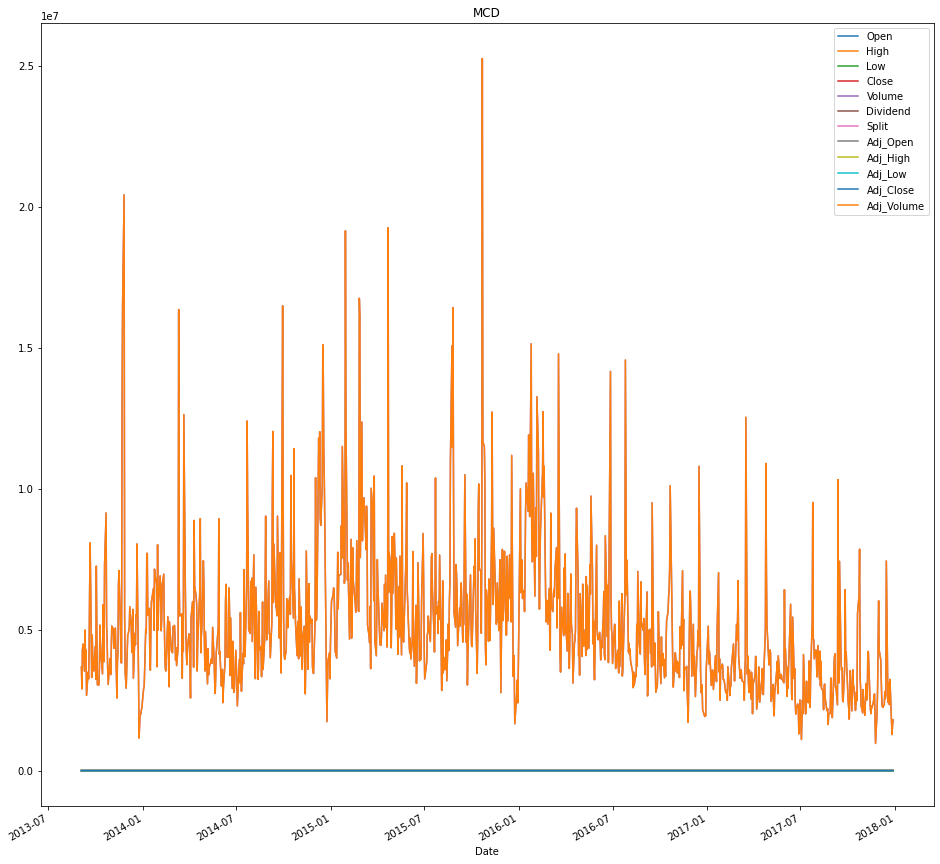

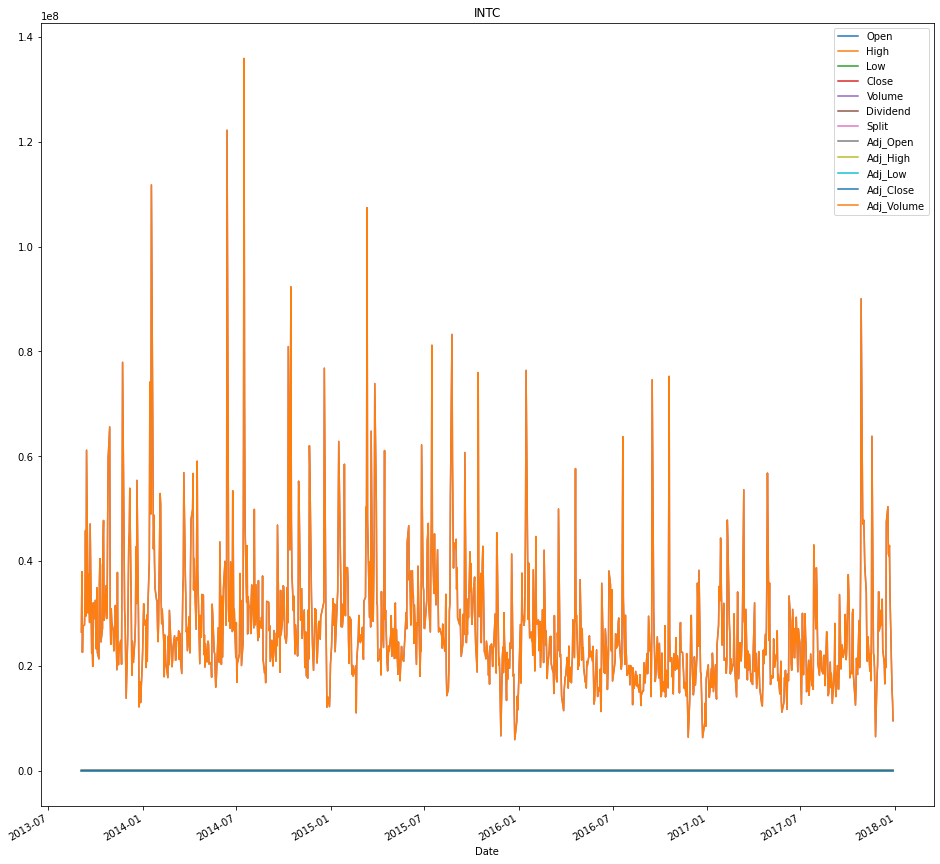

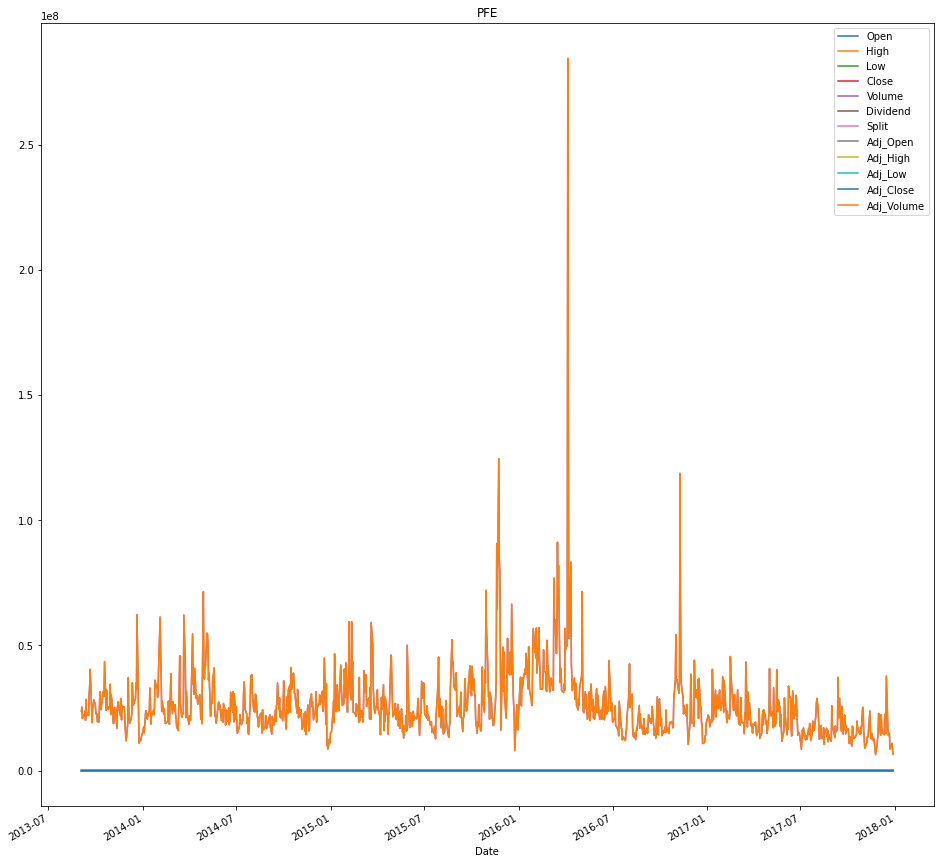

In [7]:
for stock_id in range(len(stock_list)):
    df_list[stock_id].plot(figsize=(16,16), title=stock_list[stock_id])

In [19]:
s = pd.Series(df_list)
X = s.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: cannot copy sequence with size 1090 to array axis with dimension 12